In [1]:
pip install matplotlib seaborn pandas

EDA is the process of understanding your data by visualizing and summarizing it before applying any machine learning.

It helps find:

- Patterns or trends

- Relationships between variables

- Missing data or errors

- Outliers (unusual data points)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load sample dataset

In [3]:
data=sns.load_dataset('titanic')

In [4]:
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Basic Data Understanding

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [6]:
print(data.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [7]:
print(data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Visualizing Data

Plotting Single Variable (Univariate Analysis)

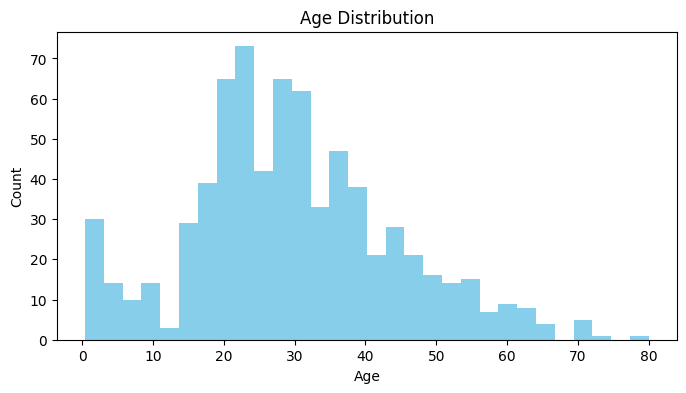

In [10]:
# Histogram — Understand distribution of numeric data
plt.figure(figsize=(8,4))
plt.hist(data['age'].dropna(), bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

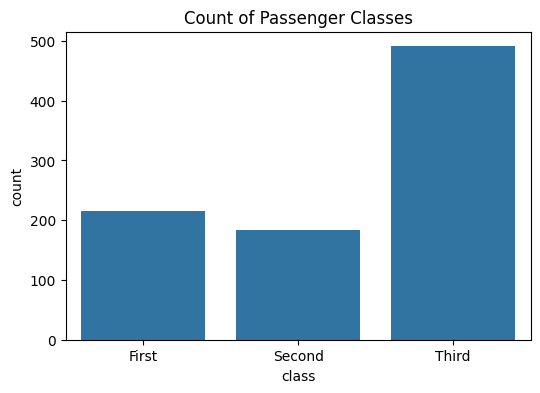

In [11]:
# b) Countplot — For categorical data
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=data)
plt.title('Count of Passenger Classes')
plt.show()

 Plotting Two Variables (Bivariate Analysis)

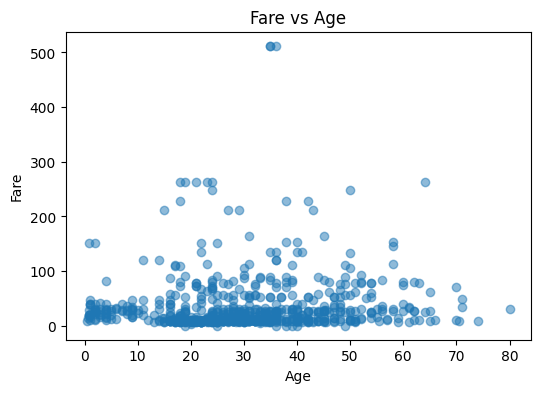

In [13]:
#  Scatter Plot — For two numeric variables
plt.figure(figsize=(6,4))
plt.scatter(data['age'], data['fare'], alpha=0.5)
plt.title('Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

Box Plot — Check distribution and detect outliers for one variable grouped by another

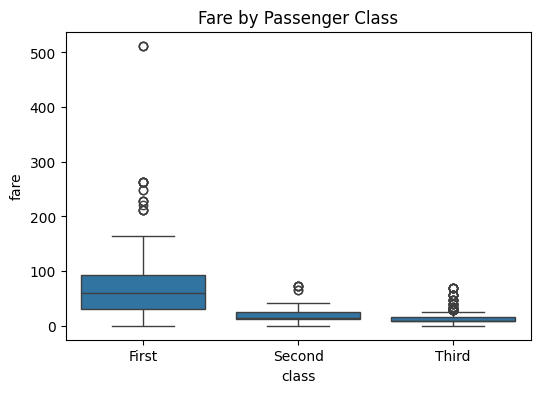

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='fare', data=data)
plt.title('Fare by Passenger Class')
plt.show()

Correlation Heatmap
Find correlation between numeric variables:

Visualizing Relationships with Seaborn

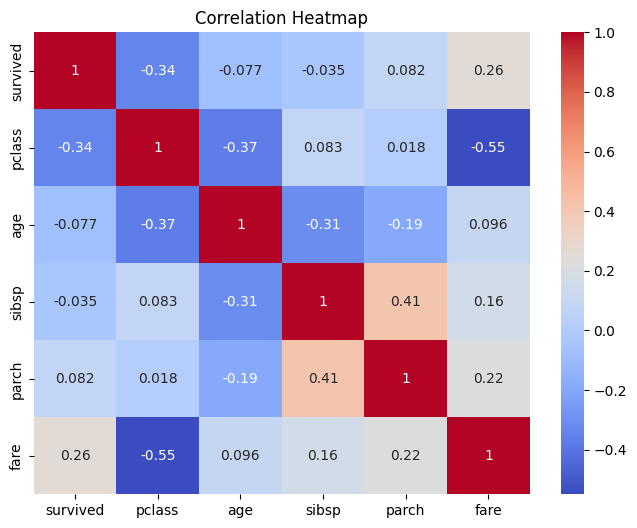

In [18]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Now calculate correlation
plt.figure(figsize=(8,6))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Detect Missing Data & Outliers

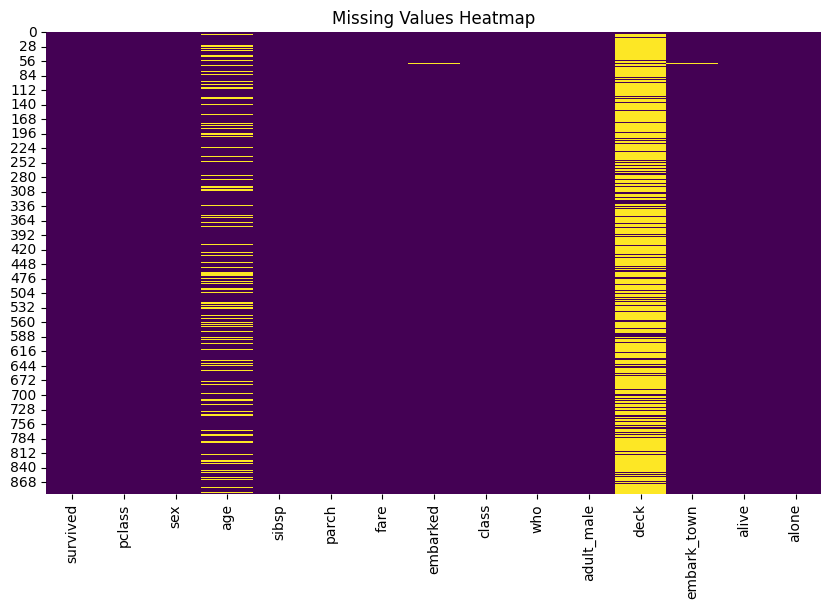

In [19]:
#  Visualize Missing Data
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

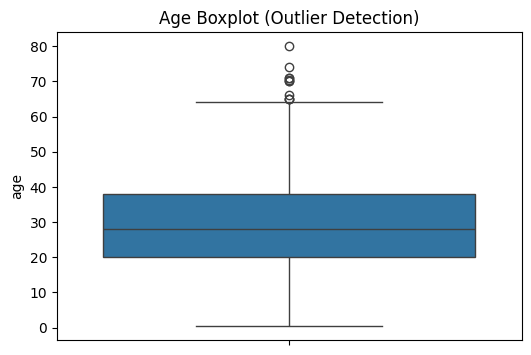

In [21]:
#  Detect Outliers with Box Plot
plt.figure(figsize=(6,4))
sns.boxplot(data['age'])
plt.title('Age Boxplot (Outlier Detection)')
plt.show()


Advanced Visualizations

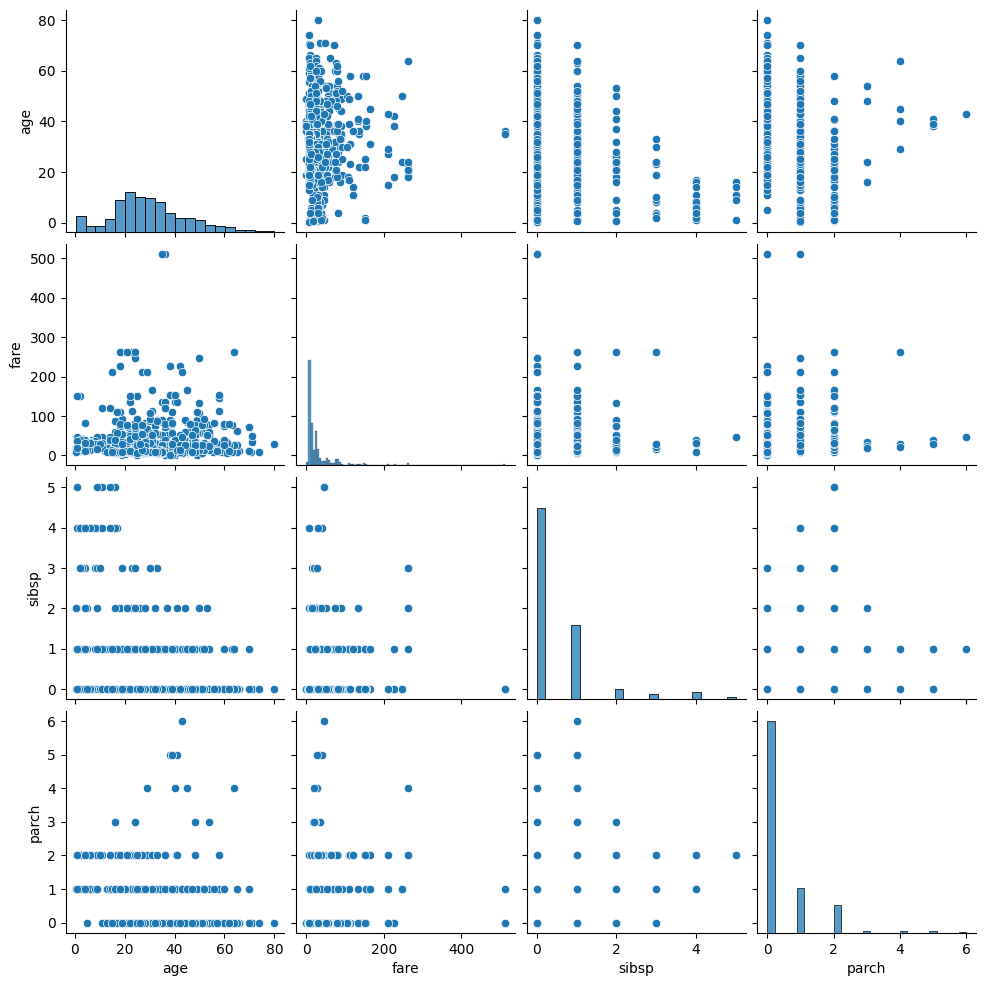

In [23]:
# Pairplot — Scatterplots of all numeric variables against each other
sns.pairplot(data[['age', 'fare', 'sibsp', 'parch']].dropna())
plt.show()

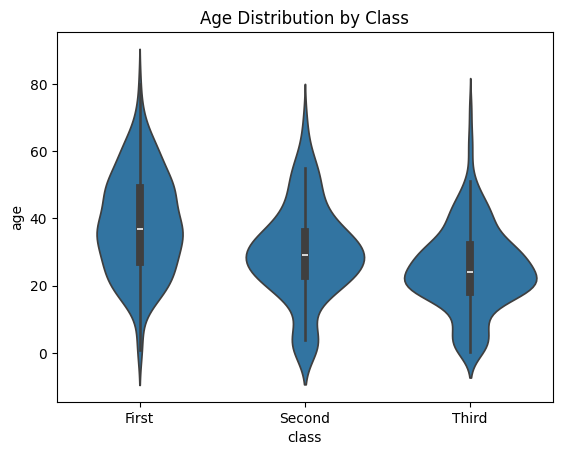

In [24]:
# Violin Plot — Combines box plot with KDE (distribution)
sns.violinplot(x='class', y='age', data=data)
plt.title('Age Distribution by Class')
plt.show()